# Condensed Nearest Neighbors Analysis

## Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import CondensedNearestNeighbour

plt.style.use("dark_background")

%matplotlib inline

---

## Create Data

In [5]:
def make_data(sep):
    
    # Returns arrays
    X, y = make_classification(
        n_samples= 1000,
        n_features = 2,
        n_redundant=0,
        n_clusters_per_class = 1,
        weights= [0.99],
        class_sep= sep,
        random_state = 10
    )
    
    # Transform arrays into pandas dataframe and series
    X = pd.DataFrame(X, columns = ["varA", "varB"])
    y = pd.Series(y)

    return X, y

0    985
1     15
Name: count, dtype: int64


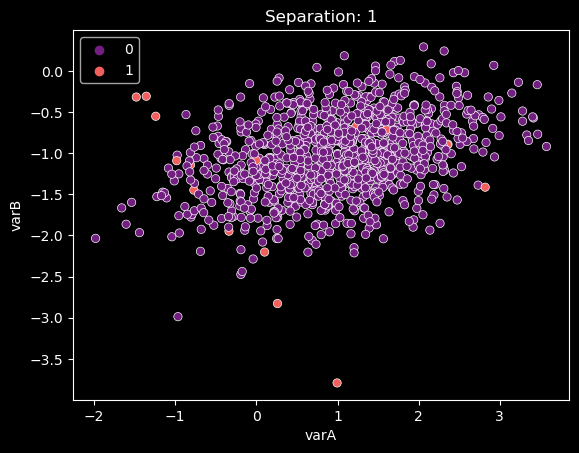

0    985
1     15
Name: count, dtype: int64


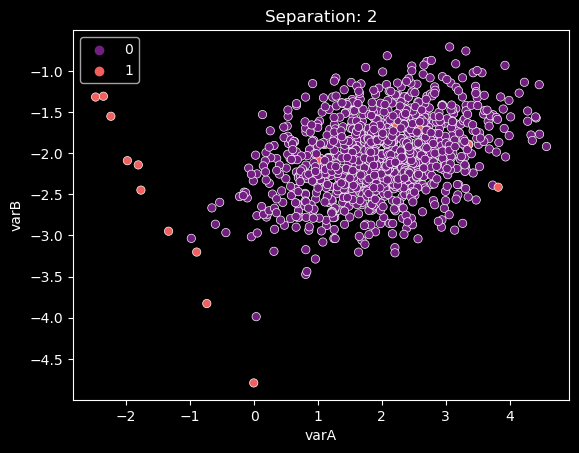

0    985
1     15
Name: count, dtype: int64


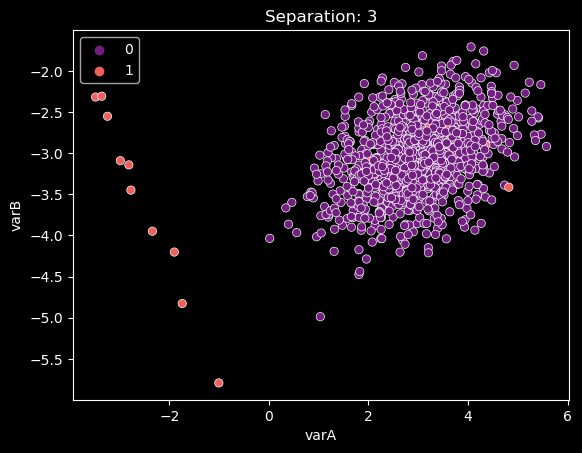

In [14]:
# create datasets with different class separatedness and plot

for sep in range(1,4):
    X, y = make_data(sep)
    
    print(y.value_counts())
    
    sns.scatterplot(
        data= X, 
        x = "varA",
        y = "varB",
        palette= "magma",
        hue = y
    )
    plt.title("Separation: {}".format(sep))
    plt.show();

## Under-sample with Condensed Nearest Neighbours

### Well Separated Classes

In [7]:
# create data

X, y = make_data(sep = 2)

cnn = CondensedNearestNeighbour(
    sampling_strategy= "auto",
    random_state = 0, 
    n_neighbors= 1,
    n_jobs = 6
)

X_resampled, y_resampled = cnn.fit_resample(X, y)

<blockquote>In the original publication of the Condensed Nearest Neighbours method, it utilizes the parameter n_neighbors set to 1.</blockquote>

In [8]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# size of the under-sampled data

X_resampled.shape, y_resampled.shape

((55, 2), (55,))

<blockquote>The resampled dataset contains 70 observations. 

These observations are determined by the algorithm.

It has nothing to do with the number of observations in the minority class, which contains 17 observations.</blockquote>

In [10]:
# number of minority class observations

y.value_counts()

0    985
1     15
Name: count, dtype: int64

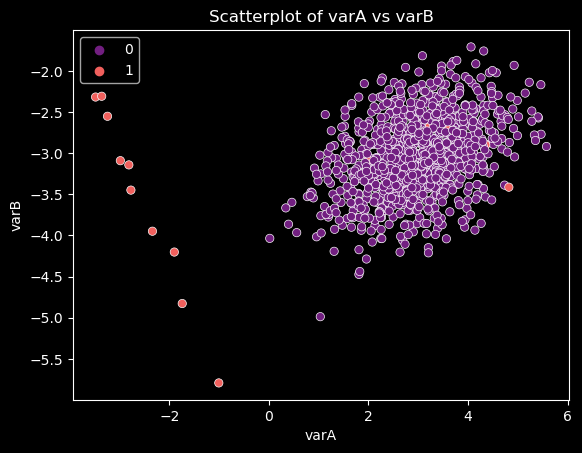

In [19]:
sns.scatterplot(
    data = X,
    x = "varA",
    y = "varB",
    palette= "magma",
    hue = y
)
plt.xlabel("varA")
plt.ylabel("varB")
plt.title("Scatterplot of varA vs varB");

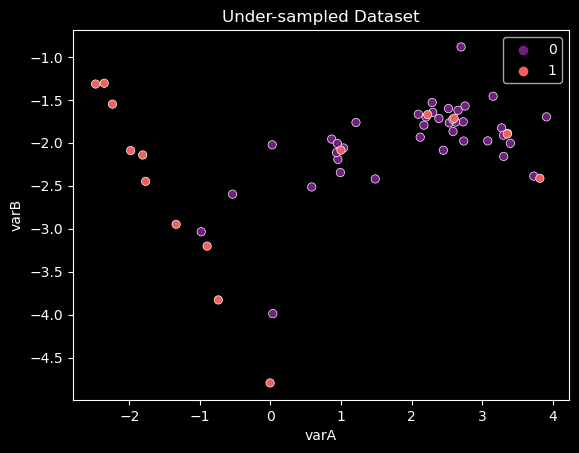

In [20]:
sns.scatterplot(
    data = X_resampled,
    x = "varA",
    y = "varB",
    palette= "magma",
    hue = y_resampled
)

plt.title("Under-sampled Dataset")
plt.show()

<blockquote>Condensed Nearest Neighbours retains the observations from the majority class, that are more similar to those in the minority class.</blockquote>